In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Importar el DataSet Limpio

In [2]:
df = pd.read_csv("ProjectClean2.csv")

In [3]:
df.head()

,host_since,host_location,host_is_superhost,host_identity_verified,host_has_profile_pic,neighbourhood,latitude,longitude,room_type,accommodates,...,review_scores_value,reviews_per_month,instant_bookable,bathroom_type,has_license,has_terrace,has_wifi,pet_allowed,has_AC,has_kitchen
0,4646,spain,False,True,True,eixample,41.401810,2.17610,entire_home_apt,2,...,4.67,1.15,True,1,True,True,True,False,True,True
1,4646,spain,False,True,True,ciutat_vella,41.379360,2.17376,entire_home_apt,6,...,4.50,0.02,False,1,True,False,True,False,False,True
2,5312,spain,False,True,True,eixample,41.405560,2.17262,entire_home_apt,8,...,4.30,0.30,True,1,True,True,True,False,True,True
3,5263,spain,False,True,True,sant_marti,41.412432,2.21975,entire_home_apt,5,...,4.64,0.48,False,1,True,True,True,False,True,True
4,5180,spain,False,True,True,gracia,41.405660,2.17015,entire_home_apt,6,...,4.50,0.77,False,1,True,True,True,False,True,True


In [4]:
df.shape

(15189, 36)

In [5]:
# Eliminar las columnas 'latitud' y 'longitud' permanentemente para evitar redundancias
df.drop('latitude', axis=1, inplace=True)
df.drop('longitude', axis=1, inplace=True)

In [6]:
df.shape

(15189, 34)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15189 entries, 0 to 15188
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_since                   15189 non-null  int64  
 1   host_location                15189 non-null  object 
 2   host_is_superhost            15189 non-null  bool   
 3   host_identity_verified       15189 non-null  bool   
 4   host_has_profile_pic         15189 non-null  bool   
 5   neighbourhood                15189 non-null  object 
 6   room_type                    15189 non-null  object 
 7   accommodates                 15189 non-null  int64  
 8   bathrooms                    15189 non-null  float64
 9   bedrooms                     15189 non-null  float64
 10  beds                         15189 non-null  float64
 11  price                        15189 non-null  float64
 12  minimum_nights               15189 non-null  float64
 13  maximum_nights  

# Distribucion de nuestra variable objetivo

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


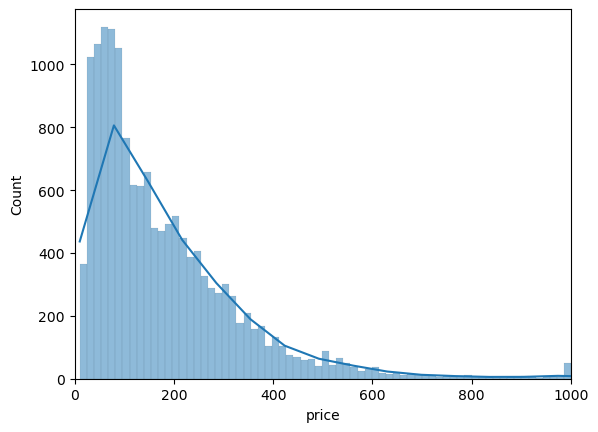

In [8]:
# Graficar la distribución de 'price'
sns.histplot(df['price'], kde=True)
plt.xlim([0, 1000])
plt.show()

# Convertir las variables categóricas en variables dummy

In [9]:
# Convertir las variables categóricas en variables dummy (One-Hot Encoding)
df = pd.get_dummies(df, drop_first=True)  

# Matriz de Correlacion

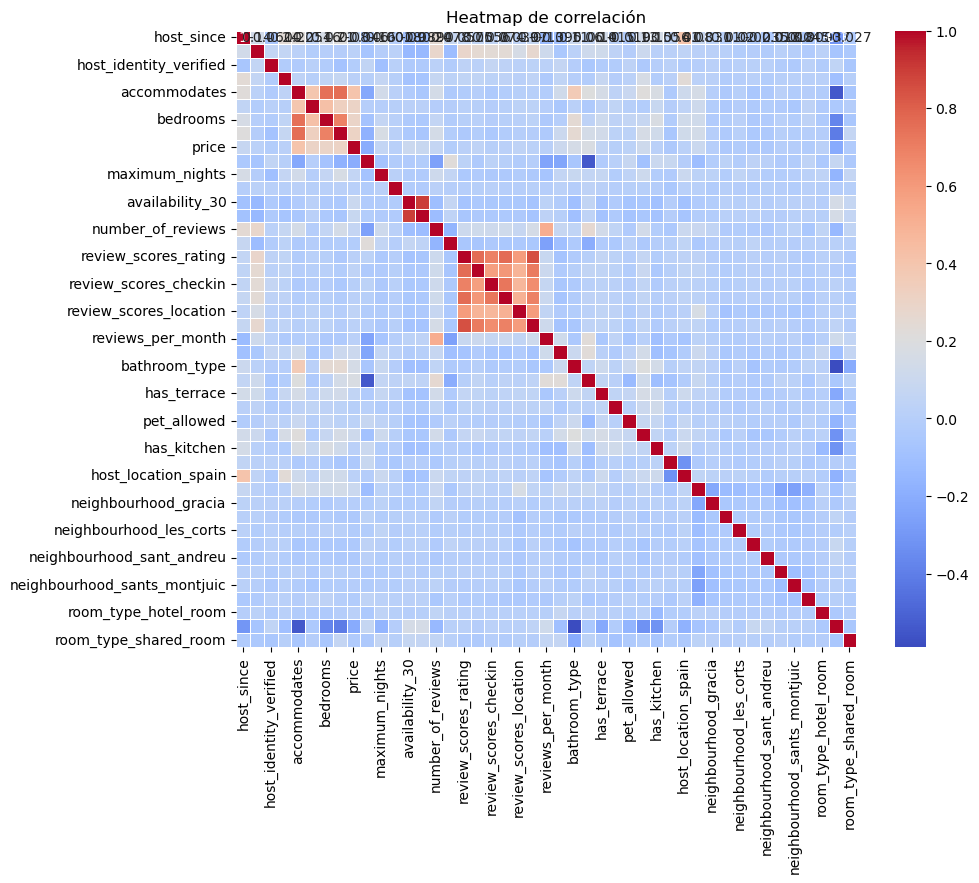

In [29]:
# Calcular la matriz de correlación
corr_matrix = df.corr()

# Graficar el heatmap de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Heatmap de correlación')
plt.show()

## Correlacion de variables con 'price'

In [11]:
corr_matrix["price"]

host_since                           0.080338
host_is_superhost                    0.022703
host_identity_verified              -0.017460
host_has_profile_pic                 0.015827
accommodates                         0.406440
bathrooms                            0.299193
bedrooms                             0.296159
beds                                 0.306178
price                                1.000000
minimum_nights                      -0.203179
maximum_nights                       0.060680
has_availability                     0.010551
availability_30                      0.099842
availability_60                      0.085193
number_of_reviews                    0.066694
last_review                         -0.012650
review_scores_rating                 0.018213
review_scores_cleanliness            0.044430
review_scores_checkin                0.004252
review_scores_communication          0.018429
review_scores_location               0.038847
review_scores_value               

## filtro variables mas correlacionadas con 'price'

In [12]:
filtro = (corr_matrix.corr()["price"]>0.2) | (corr_matrix.corr()["price"]<-0.2)

In [28]:
filtro

host_since                            True
host_is_superhost                    False
host_identity_verified               False
host_has_profile_pic                 False
accommodates                          True
bathrooms                             True
bedrooms                              True
beds                                  True
price                                 True
minimum_nights                        True
maximum_nights                       False
has_availability                     False
availability_30                      False
availability_60                      False
number_of_reviews                    False
last_review                          False
review_scores_rating                 False
review_scores_cleanliness            False
review_scores_checkin                False
review_scores_communication          False
review_scores_location               False
review_scores_value                  False
reviews_per_month                    False
instant_boo

In [14]:
data = corr_matrix.loc[:,filtro]

# Calculamos VIF

In [15]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Seleccionamos solo las columnas numéricas
X = data.select_dtypes(include=['number']).drop(columns=['price'])

# Agregar una constante para el modelo
X['intercept'] = 1

# Calcular el VIF para cada variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Mostrar el resultado
print(vif)

                  Variable        VIF
0               host_since   1.973690
1             accommodates  45.156026
2                bathrooms   3.037654
3                 bedrooms  21.440715
4                     beds  17.686367
5           minimum_nights   4.953258
6         instant_bookable   1.820417
7            bathroom_type   4.631249
8              has_license   4.721726
9                   has_AC   1.868102
10  neighbourhood_eixample   1.227830
11  room_type_private_room  11.148092
12               intercept   1.509635


In [16]:
data.shape

(45, 13)

# Generar Modelo

## obtenemos variables seleccionadas con forward

In [17]:
from sklearn.feature_selection import SequentialFeatureSelector

# Crear el modelo de regresión lineal
model = LinearRegression()

# Selección hacia adelante para escoger las variables más influyentes
sfs = SequentialFeatureSelector(model, direction='forward', n_features_to_select=9)
sfs.fit(X, data['price'])

# Obtener las variables seleccionadas
selected_features = X.columns[sfs.get_support()]
print("Variables seleccionadas:", selected_features)

Variables seleccionadas: Index(['host_since', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bathroom_type', 'neighbourhood_eixample', 'room_type_private_room',
       'intercept'],
      dtype='object')


## eliminamos 'intercept'

In [18]:
selected_features = selected_features.tolist()  # Convierte el Index en una lista
selected_features.remove('intercept')  # Elimina 'intercept' de la lista
selected_features

['host_since',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bathroom_type',
 'neighbourhood_eixample',
 'room_type_private_room']

## Dividimos los datos en Train y Test 

In [19]:
# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], data['price'], test_size=0.2, random_state=42)

## Escalamos las variables 

In [20]:
# Escalar las variables usando StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Crear y entrenar modelo

In [21]:
# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Ver los coeficientes del modelo
coeficientes = pd.DataFrame({
    "Variable": selected_features,
    "Coeficiente": model.coef_
})
print(coeficientes)

                 Variable  Coeficiente
0              host_since    -0.000147
1            accommodates     0.220302
2               bathrooms     0.014298
3                bedrooms    -0.073848
4                    beds    -0.044513
5           bathroom_type     0.001549
6  neighbourhood_eixample     0.003937
7  room_type_private_room     0.038674


## Predicciones

In [22]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

## Evaluamos nuestro modelo 

In [23]:
# Evaluar el modelo con métricas RMSE y R^2
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")

print(f"R^2: {r2}")

RMSE: 0.25527709588109465
R^2: 0.42465719813605407


# Crear modelo de regresión con columnas finales

In [24]:
X_train_final = X_train.loc[:,['host_since', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bathroom_type', 'neighbourhood_eixample', 'room_type_private_room']]
print(X_train_final.columns)
lm = LinearRegression()
lm.fit(X_train_final, y_train)
lm.score(X_test.loc[:,X_train_final.columns], y_test)

Index(['host_since', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bathroom_type', 'neighbourhood_eixample', 'room_type_private_room'],
      dtype='object')


0.42465719813605385

In [25]:
# 8 Variables utilizadas, es la manera en la que hemos generado el mejor R^2 

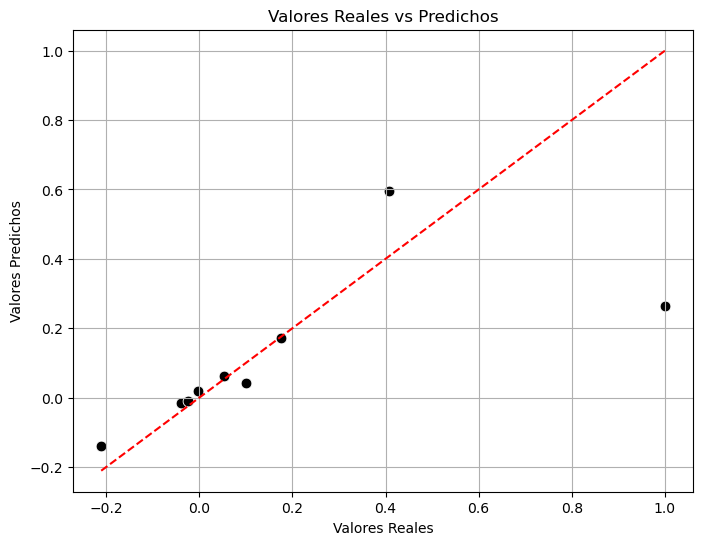

In [32]:
# Crear scatterplot: Valores reales vs valores predichos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='black', s=60)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')  # Línea de referencia
plt.title('Valores Reales vs Predichos')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.grid(True)
plt.show()